In [696]:
import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.데이터로드 및 구조 변수 이해

In [697]:
data = pd.read_csv('data/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [698]:
from sklearn.utils import resample
import pandas as pd

def perform_oversampling(data, label_column):
    # 다수 클래스와 소수 클래스 분리
    majority = data[data[label_column] == 0]
    minority = data[data[label_column] == 1]

    # 소수 클래스 오버샘플링
    minority_upsampled = resample(
        minority,
        replace=True,
        n_samples=len(majority),
        random_state=42
    )

    # 병합 및 셔플
    upsampled_data = pd.concat([majority, minority_upsampled])
    return upsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# 사용 예시
upsampled_df = perform_oversampling(data, label_column='Exited')
data = upsampled_df

In [699]:
data['Exited'].value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

| 열 이름                              | 한국어 설명                                                                                                           |
| -----------------------| ---------------------------------------------------------------------|
| **RowNumber**          | 행 번호 (데이터셋에서 각 행의 고유 번호)                                                         |
| **CustomerId**           | 고객 ID (고객을 구분하기 위한 고유 식별자)                                                     |
| **Surname**                 | 성 (고객의 성씨)                                                                                                    |
| **CreditScore**           | 신용 점수 (신용 평가 점수로, 일반적으로 높을수록 신용도가 좋음을 의미) |
| **Geography**              | 지역 (France, Spain, Germany)                                                                       |
| **Gender**                     | 성별 (남성: Male, 여성: Female)                                                                       |
| **Age**                            | 나이 (고객의 나이)                                                                                                |
| **Tenure**                      | 거래 기간 (해당 은행에서 거래한 연수)                                                             |
| **Balance**                    | 계좌 잔고 (고객 계좌의 현재 잔액)                                                                      |
| **NumOfProducts**   | 이용 중인 금융상품 수 (고객이 은행에서 이용하고 있는 상품의 개수)          |
| **HasCrCard**             | 신용카드 보유 여부 (1: 있음, 0: 없음)                                                                 |
| **IsActiveMember**  | 활성 고객 여부 (1: 활동 중인 고객, 0: 비활성 고객)                                          |
| **EstimatedSalary**  | 추정 연봉 (고객의 연간 소득 추정치 달러)                                                         |
| **Exited**                       | 이탈 여부 (1: 계좌 해지 고객, 0: 계좌 유지 고객)                                               |

In [700]:
data.info() # 결측치 없음 확인
# Age 10대 20대 이렇게 나눠서?
# Tenure, NumOfProducts, HasCrCard, IsActiveMember,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        15926 non-null  int64  
 1   CustomerId       15926 non-null  int64  
 2   Surname          15926 non-null  object 
 3   CreditScore      15926 non-null  int64  
 4   Geography        15926 non-null  object 
 5   Gender           15926 non-null  object 
 6   Age              15926 non-null  int64  
 7   Tenure           15926 non-null  int64  
 8   Balance          15926 non-null  float64
 9   NumOfProducts    15926 non-null  int64  
 10  HasCrCard        15926 non-null  int64  
 11  IsActiveMember   15926 non-null  int64  
 12  EstimatedSalary  15926 non-null  float64
 13  Exited           15926 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.7+ MB


# 2.데이터 및 기술통계

In [701]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15926.000000,1.592600e+04,15926.000000,15926.00000,15926.00000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000
mean,4982.666206,1.569080e+07,647.518398,41.14266,4.99190,82156.993230,1.511051,0.701871,0.459437,100429.673624,0.500000
std,2869.383763,7.204330e+04,97.886335,10.58781,2.93038,61369.301768,0.670881,0.457451,0.498368,57494.940428,0.500016
min,1.000000,1.556570e+07,350.000000,18.00000,0.00000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2502.250000,1.562889e+07,580.000000,34.00000,2.00000,0.000000,1.000000,0.000000,0.000000,51880.892500,0.000000
50%,4951.500000,1.569073e+07,648.000000,40.00000,5.00000,103860.020000,1.000000,1.000000,0.000000,100200.400000,0.500000
75%,7475.000000,1.575285e+07,717.000000,47.00000,8.00000,129276.140000,2.000000,1.000000,1.000000,150124.865000,1.000000
max,10000.000000,1.581569e+07,850.000000,92.00000,10.00000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [702]:
data.describe(include='object')

,Surname,Geography,Gender
count,15926,15926,15926
unique,2925,3,2
top,Martin,France,Male
freq,56,7350,8150


In [703]:
# 중복값 여부 확인
print(data.duplicated('CustomerId').sum())

5970


In [704]:
data.value_counts('Geography')

Geography
France     7350
Germany    4901
Spain      3675
Name: count, dtype: int64

# 3. 이상치 탐지

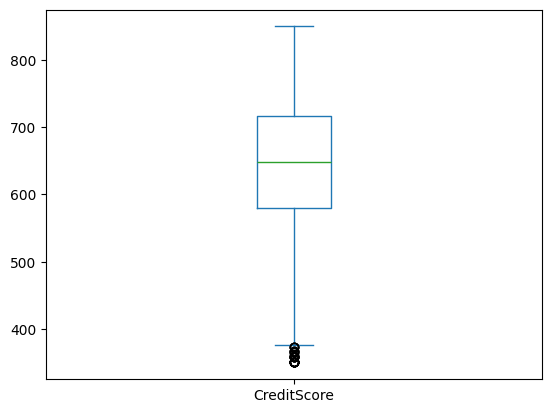

In [705]:
data['CreditScore'].plot(kind='box')
plt.show()

<Axes: >

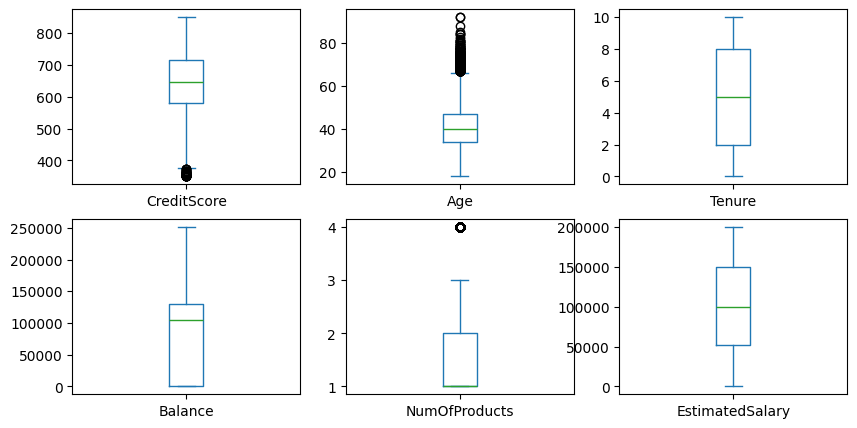

In [706]:
_, ax = plt.subplots(2, 3, figsize=(10, 5))

# 연속형 데이터 박스플롯으로 이상치 확인
data['CreditScore'].plot(kind='box', ax=ax[0][0]) # 신용등급 차이가 꽤 유의미하게 난다고 생각
data['Age'].plot(kind='box', ax=ax[0][1]) # 살아있는 고령자가 흔치 않아서 저런가?
data['Tenure'].plot(kind='box', ax=ax[0][2])
data['Balance'].plot(kind='box', ax=ax[1][0])
data['NumOfProducts'].plot(kind='box', ax=ax[1][1]) # 4개 쓰는 사람이 누구인지 봐야할듯?
data['EstimatedSalary'].plot(kind='box', ax=ax[1][2])

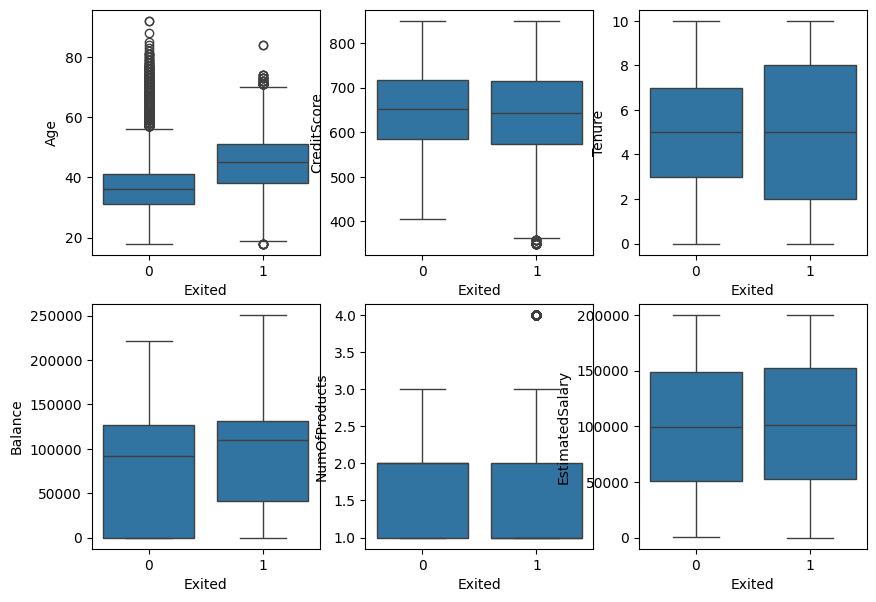

In [707]:
_, ax = plt.subplots(2, 3, figsize=(10, 7))

sns.boxplot(x='Exited', y='Age', data=data, ax=ax[0][0])
sns.boxplot(x='Exited', y='CreditScore', data=data, ax=ax[0][1])
sns.boxplot(x='Exited', y='Tenure', data=data, ax=ax[0][2])
sns.boxplot(x='Exited', y='Balance', data=data, ax=ax[1][0])
sns.boxplot(x='Exited', y='NumOfProducts', data=data, ax=ax[1][1])
sns.boxplot(x='Exited', y='EstimatedSalary', data=data, ax=ax[1][2])
plt.show()

# 4. 변수분포 시각화

<Axes: xlabel='IsActiveMember', ylabel='count'>

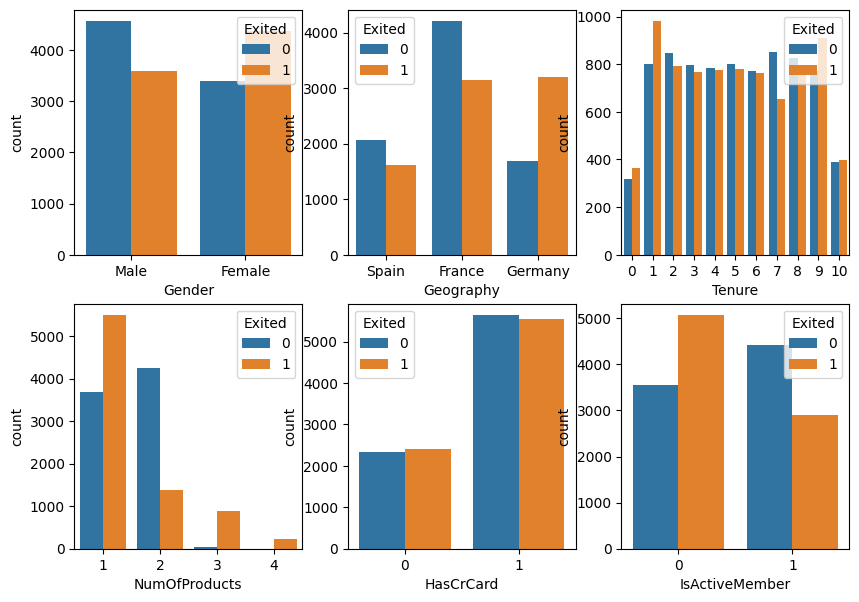

In [708]:
# 명목형 자료들의 이탈 비교
_, ax = plt.subplots(2, 3, figsize=(10, 7))

sns.countplot(data=data, x='Gender', hue='Exited', ax=ax[0][0]) # 비율적으로 여성의 이탈률이 10퍼 정도 높음
sns.countplot(data=data, x='Geography', hue='Exited', ax=ax[0][1])
sns.countplot(data=data, x='Tenure', hue='Exited', ax=ax[0][2])
sns.countplot(data=data, x='NumOfProducts', hue='Exited', ax=ax[1][0])
sns.countplot(data=data, x='HasCrCard', hue='Exited', ax=ax[1][1])
sns.countplot(data=data, x='IsActiveMember', hue='Exited', ax=ax[1][2]) # 비활성 고객이 이탈 할 확률이 높아보임

# 5.변수관계 시각화

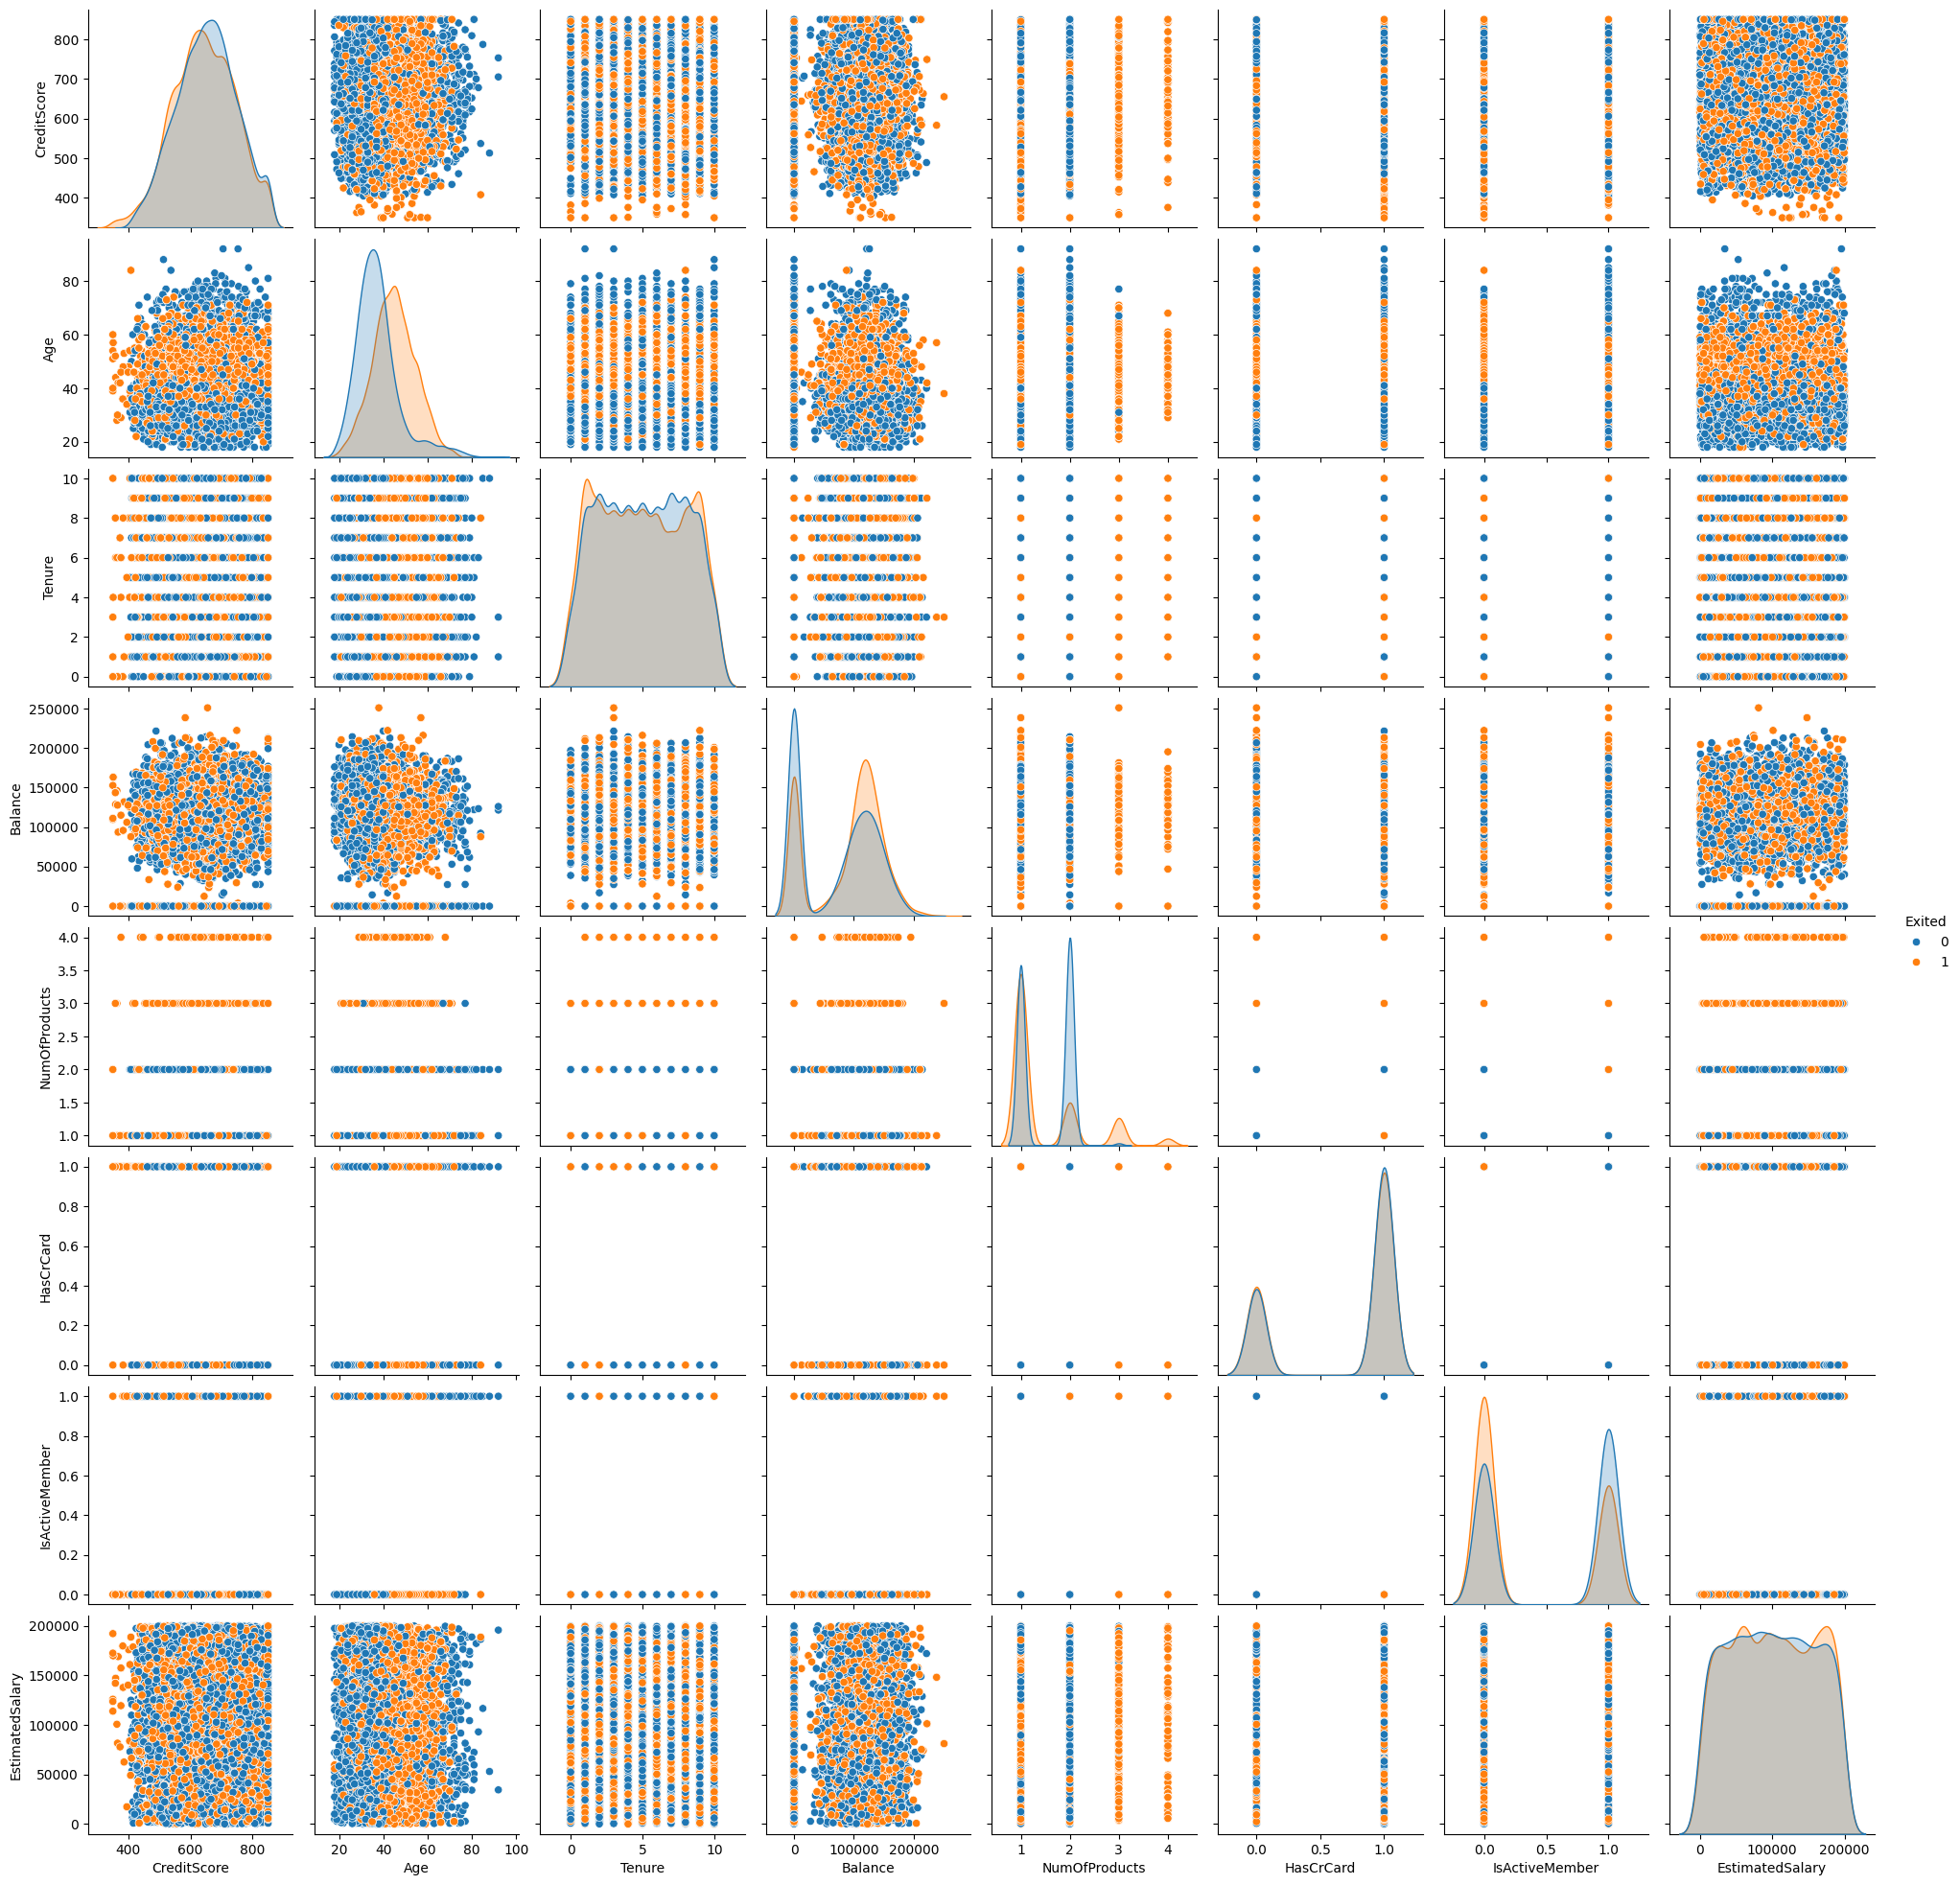

In [709]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
sns.pairplot(data=data, hue='Exited')
plt.show()

In [710]:
data['Exited'].value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

# 6. 상관관계 및 교차분석

In [711]:
corr_mat = data.corr(numeric_only=True)
corr_mat.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.012884,0.002117,0.006548,0.006463,0.001990,0.019424,-0.017717,-0.044285
Age,-0.012884,1.000000,-0.017553,0.049590,-0.024056,-0.023099,0.011224,-0.003999,0.352706
Tenure,0.002117,-0.017553,1.000000,0.002769,0.020536,0.022136,-0.030044,0.023952,-0.014121
Balance,0.006548,0.049590,0.002769,1.000000,-0.184336,-0.005761,-0.029862,0.000085,0.153366
NumOfProducts,0.006463,-0.024056,0.020536,-0.184336,1.000000,-0.010544,0.031860,0.016220,-0.049513


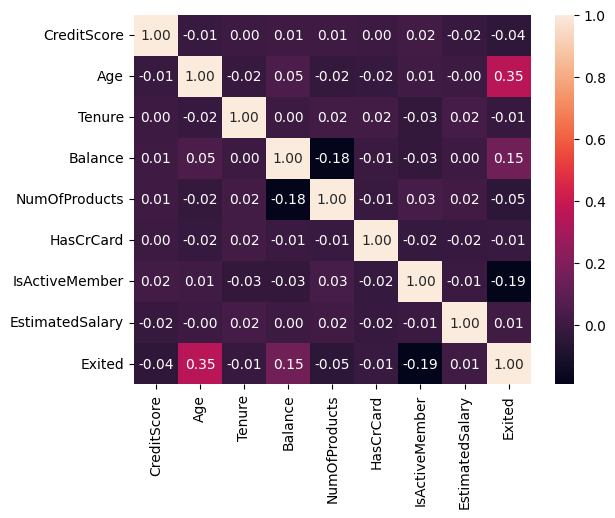

In [712]:
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

# 7. feature engineering

In [713]:
# from sklearn.preprocessing import LabelEncoder
#
# encoder = LabelEncoder()
#
# # 남성 0 , 여성 1
# data.loc[:, 'Gender'] = encoder.fit_transform(data['Gender'])
# print(encoder.classes_)
# data.head()

In [714]:
# 지역 원핫인코딩 실시
data = pd.get_dummies(data, columns=['Geography', 'Gender'], dtype=int)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,692,46,2,0.00,2,1,1,105983.09,0,0,0,1,0,1
1,516,37,8,113143.12,1,0,0,3363.36,0,1,0,0,1,0
2,531,37,1,143407.29,2,0,1,84402.46,0,0,0,1,0,1
3,717,36,2,99472.76,2,1,0,94274.72,1,1,0,0,1,0
4,737,43,1,125537.38,1,1,0,138510.01,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,562,37,2,0.00,1,0,1,52525.15,1,1,0,0,0,1
15922,606,34,3,161572.24,1,0,1,191076.22,0,0,0,1,0,1
15923,678,32,5,0.00,2,1,0,90284.47,0,1,0,0,1,0
15924,692,36,4,0.00,1,1,0,185580.89,1,1,0,0,1,0


In [715]:
# 나이그룹 범주형으로 변환
# data['AgeGroup']= pd.cut(data['Age'], bins =[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, data['Age'].max()], labels=range(10)).astype(int)
# data = data.drop(columns=['Age'])
# data

In [716]:
# # Exited와 Agegroup 간의 상관관계가 오히려 떨어짐 -> 기존의 age를 사용하는게 나음
# corr_mat = data.corr(numeric_only=True)
# corr_mat.head()
# sns.heatmap(corr_mat, annot=True, fmt='.2f')
# plt.show()

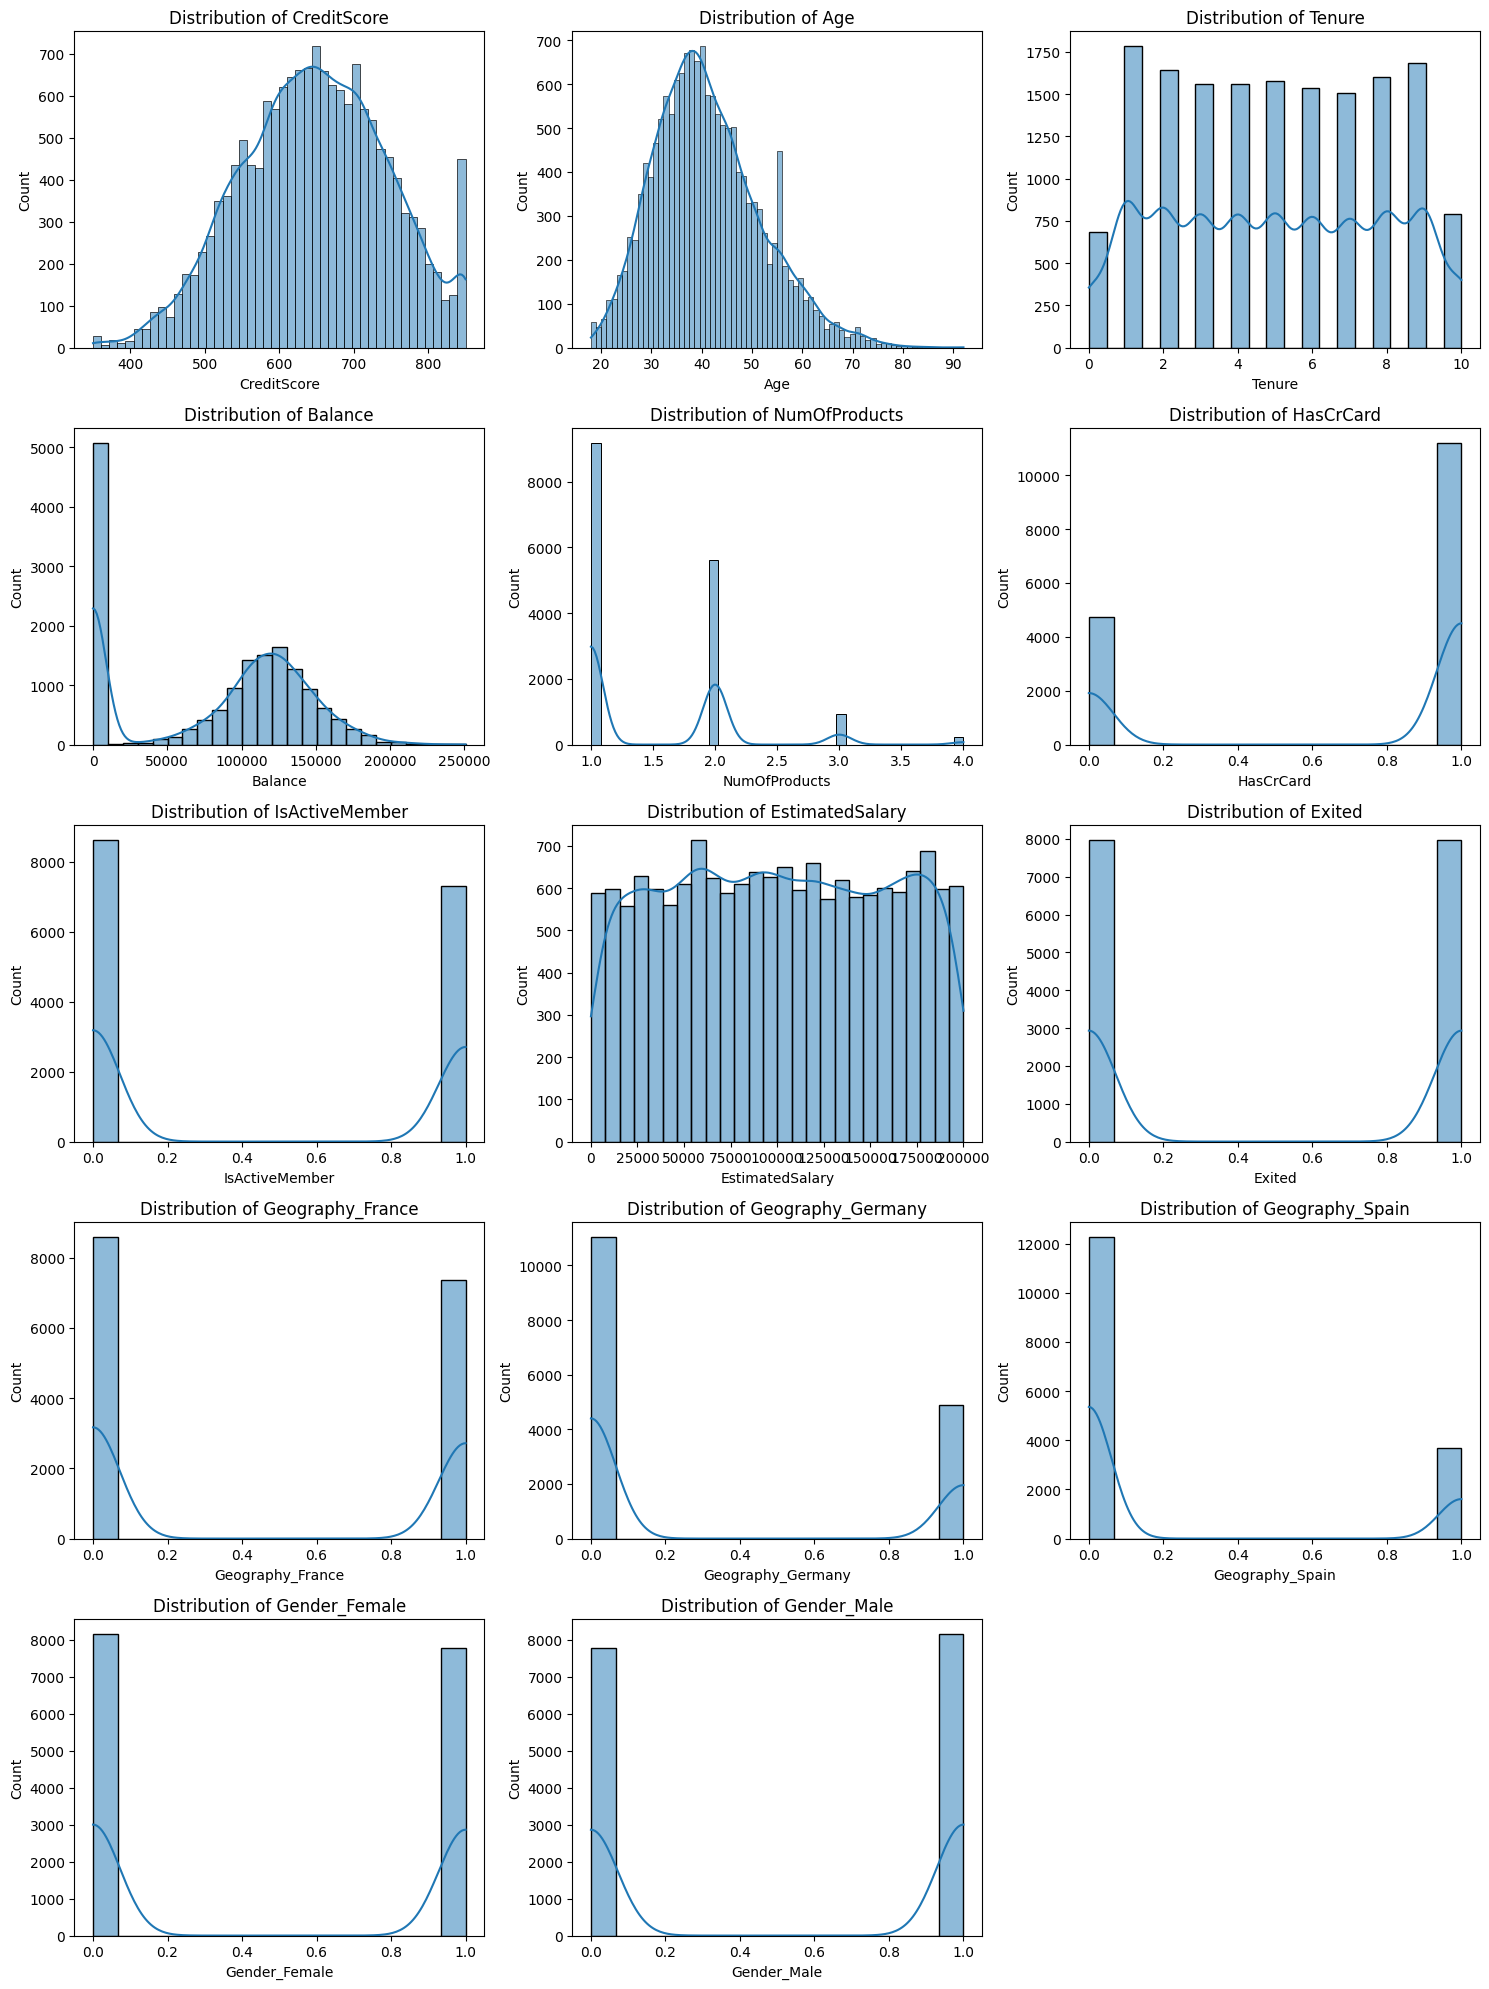

In [717]:
# 연속형 수치형 데이터만 추출
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# subplot 크기 설정
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# 변수별 히스토그램 시각화
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [718]:
# sns.histplot(data=data, x='CreditScore')
# plt.show()
#
# # 연속형 변수들을 로그 스케일링 실시
# data['LogCreditScore'] = data['CreditScore'].apply(lambda x: np.log1p(x))
# sns.histplot(data=data, x='LogCreditScore')
# plt.show()

# -> 스케일링을 헀는데 오히려 더 치우친걸 보니 스케일링 할 필요없는 특성

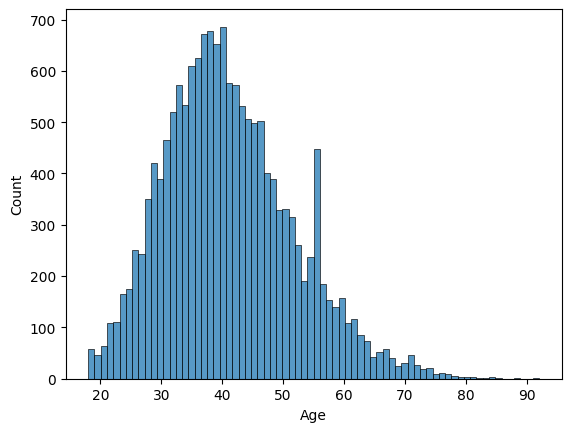

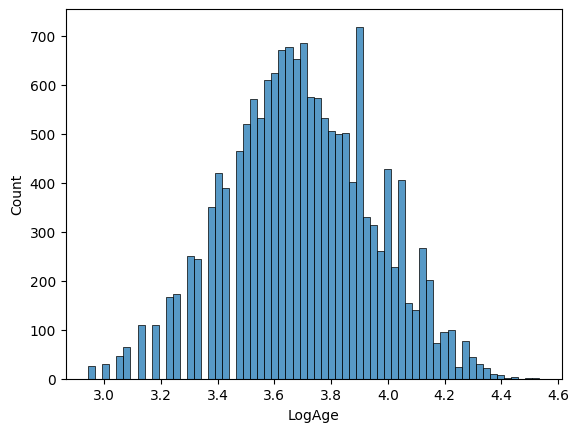

In [719]:
sns.histplot(data=data, x='Age')
plt.show()

# 연속형 변수들을 로그 스케일링 실시
data['LogAge'] = data['Age'].apply(lambda x: np.log1p(x))
sns.histplot(data=data, x='LogAge')
plt.show()

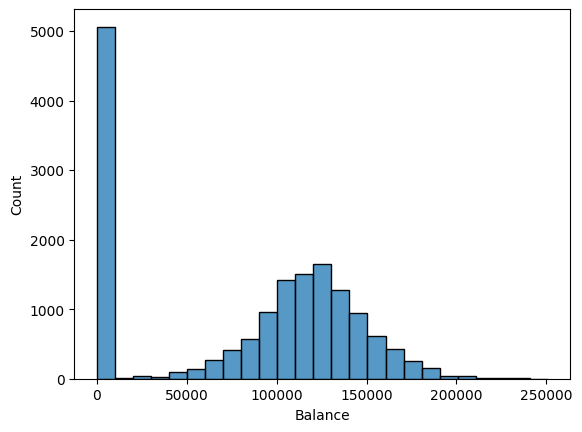

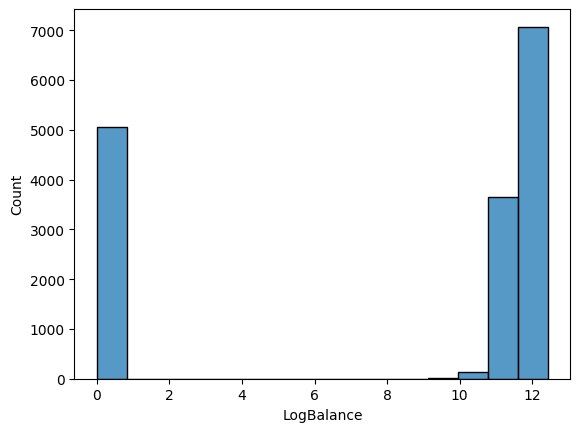

In [720]:
sns.histplot(data=data, x='Balance')
plt.show()

# 연속형 변수들을 로그 스케일링 실시
data['LogBalance'] = data['Balance'].apply(lambda x: np.log1p(x))
sns.histplot(data=data, x='LogBalance')
plt.show()

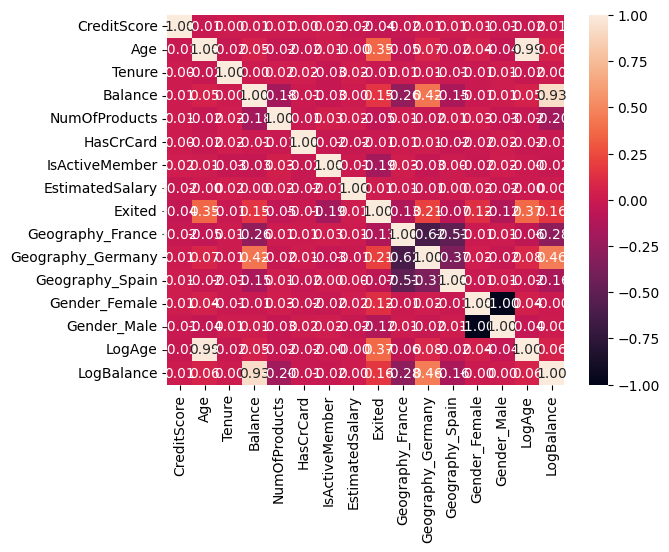

In [721]:
corr_mat = data.corr(numeric_only=True)

sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

In [722]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,LogAge,LogBalance
0,692,46,2,0.00,2,1,1,105983.09,0,0,0,1,0,1,3.850148,0.000000
1,516,37,8,113143.12,1,0,0,3363.36,0,1,0,0,1,0,3.637586,11.636418
2,531,37,1,143407.29,2,0,1,84402.46,0,0,0,1,0,1,3.637586,11.873451
3,717,36,2,99472.76,2,1,0,94274.72,1,1,0,0,1,0,3.610918,11.507649
4,737,43,1,125537.38,1,1,0,138510.01,1,0,1,0,1,0,3.784190,11.740367


# 08. 데이터분할 및 스케일링

In [723]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
#
# # 일단 로그칼럼들을 제외하고 적용
# X = data.drop(columns=['Exited', 'LogBalance', 'LogAge'])
# y = data['Exited']
#
# Banking_df = pd.DataFrame(X, columns=X.columns) # 칼럼이름 보존
#
# X_train, X_test, y_train, y_test = train_test_split(Banking_df, y, test_size=0.2, random_state=42, stratify=y)
#
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [724]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 로그칼럼들을 적용
X = data.drop(columns=['Exited', 'Balance', 'Age'])
y = data['Exited']

Banking_df = pd.DataFrame(X, columns=X.columns) # 칼럼이름 보존

X_train, X_test, y_train, y_test = train_test_split(Banking_df, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12740, 13) (12740,)
(3186, 13) (3186,)


In [725]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12740, 13) (12740,)
(3186, 13) (3186,)


In [726]:
X_train[:5]

array([[-3.43980168e-02,  1.54807649e-03, -7.62921040e-01,
         6.49763383e-01, -9.19405824e-01,  9.83001858e-01,
         1.08080599e+00, -6.69247193e-01, -5.45663635e-01,
        -9.76722955e-01,  9.76722955e-01,  3.83026033e-01,
         5.98796137e-01],
       [ 1.07391424e+00,  1.54807649e-03,  7.28274733e-01,
        -1.53902178e+00, -9.19405824e-01, -1.43778239e+00,
        -9.25235433e-01,  1.49421620e+00, -5.45663635e-01,
         1.02383178e+00, -1.02383178e+00, -5.07467132e-01,
         6.20310858e-01],
       [-1.83413443e+00,  1.70176312e+00,  7.28274733e-01,
         6.49763383e-01, -9.19405824e-01,  1.34230450e+00,
        -9.25235433e-01,  1.49421620e+00, -5.45663635e-01,
        -9.76722955e-01,  9.76722955e-01,  9.60002581e-01,
         6.80702082e-01],
       [ 4.63834099e-01, -1.01858095e+00,  7.28274733e-01,
        -1.53902178e+00, -9.19405824e-01, -1.35264352e+00,
        -9.25235433e-01,  1.49421620e+00, -5.45663635e-01,
        -9.76722955e-01,  9.76722955e

## 1-1. 결정트리

In [727]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

dt_clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=100,
    min_samples_leaf=5,

)
dt_clf.fit(X_train, y_train)



print('학습셋 R^2: ', dt_clf.score(X_train, y_train))
print('평가셋 R^2: ', dt_clf.score(X_test, y_test))

학습셋 R^2:  0.7711145996860282
평가셋 R^2:  0.7639673571876961


In [728]:
# 하이퍼파라미터 최적화
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid ={
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    cv=3, # 교차검증 폴드 수
    n_jobs=-1, # 병렬 처리 (가능한 모든 코어 사용)
    scoring='accuracy') # n_jobs는 cpu개수 제한
grid_search.fit(X_train, y_train)

print('best_params_:', grid_search.best_params_)
print('best_score_:', grid_search.best_score_)

best_model = grid_search.best_estimator_
print('학습셋:',best_model.score(X_train, y_train))
print('평가셋:',best_model.score(X_test, y_test))

# 테스트셋 예측 및 성능 평가
y_pred = best_model.predict(X_test)
print("Accuracy (Test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

best_params_: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_score_: 0.7645212456453795
학습셋: 0.7716640502354788
평가셋: 0.7655367231638418
Accuracy (Test): 0.7655367231638418

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      1627
           1       0.75      0.78      0.76      1559

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186


Confusion Matrix:
 [[1227  400]
 [ 347 1212]]


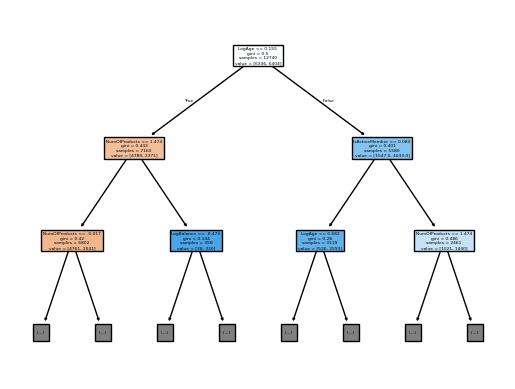

In [729]:
# 시각화
from sklearn.tree import plot_tree

plot_tree(
    dt_clf,
    filled=True,
    feature_names=X.columns,
    max_depth=2
)
plt.savefig('dt_tree_bank_exited.png', dpi=300, bbox_inches='tight')
plt.show()

## 1-2. SGDClassifier

In [730]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 준비
X = data.drop(columns=['Exited', 'Balance', 'Age'])  # 로그 변환된 칼럼으로 대체 가능
y = data['Exited']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'loss': ['log_loss', 'hinge'],  # 'log_loss' = 로지스틱 회귀, 'hinge' = SVM 방식
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'eta0': [0.01, 0.1],
    'max_iter': [1000],
    'tol': [1e-3]
}

# GridSearchCV 설정
grid = GridSearchCV(
    estimator=SGDClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # 또는 'f1', 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=2
)

# 학습 수행
grid.fit(X_train_scaled, y_train)

# 최적 모델과 파라미터
best_model = grid.best_estimator_
print("Best Parameters:\n", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# 테스트셋 예측 및 성능 평가
y_pred = best_model.predict(X_test_scaled)
print("Accuracy (Test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters:
 {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}
Best CV Score: 0.7124018838304552
Accuracy (Test): 0.7278719397363466

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      1593
           1       0.73      0.73      0.73      1593

    accuracy                           0.73      3186
   macro avg       0.73      0.73      0.73      3186
weighted avg       0.73      0.73      0.73      3186


Confusion Matrix:
 [[1162  431]
 [ 436 1157]]


In [733]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import numpy as np
import pandas as pd

def metric_df_classifier(X_train, X_test, y_train, y_test):
    model_names = []
    accs, pres, recs, f1s, rocs, log_losses = [], [], [], [], [], []

    models = {
        'KNN 분류기': KNeighborsClassifier(),
        '로지스틱 회귀': LogisticRegression(max_iter=5000, solver='lbfgs'),
        '결정트리 분류기': DecisionTreeClassifier(random_state=42),
        'SGD 분류기': SGDClassifier(max_iter=5000, tol=1e-3, random_state=42),
        'Ridge 분류기': RidgeClassifier(),
        '랜덤포레스트 분류기': RandomForestClassifier(n_estimators=5000, random_state=42),
        'XGBoost 분류기': XGBClassifier(eval_metric='logloss', random_state=42)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        model_names.append(model_name)
        accs.append(accuracy_score(y_test, pred))
        pres.append(precision_score(y_test, pred))
        recs.append(recall_score(y_test, pred))
        f1s.append(f1_score(y_test, pred))
        rocs.append(roc_auc_score(y_test, pred_proba) if pred_proba is not None else np.nan)
        log_losses.append(log_loss(y_test, pred_proba) if pred_proba is not None else np.nan)

    score_df = pd.DataFrame({
        '모델': model_names,
        'Accuracy': accs,
        'Precision': pres,
        'Recall': recs,
        'F1-Score': f1s,
        'ROC AUC': rocs,
        'Log Loss': log_losses
    })

    return score_df.round(3)

In [734]:
score_df = metric_df_classifier(X_train, X_test, y_train, y_test)
display(score_df)

/Users/joseongjae/anaconda3/envs/ai_basic_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,모델,Accuracy,Precision,Recall,F1-Score,ROC AUC,Log Loss
0,KNN 분류기,0.702,0.664,0.816,0.732,0.770,2.249
1,로지스틱 회귀,0.720,0.724,0.713,0.718,0.781,0.566
2,결정트리 분류기,0.915,0.867,0.979,0.920,0.915,3.077
3,SGD 분류기,0.500,0.000,0.000,0.000,NaN,NaN
4,Ridge 분류기,0.722,0.725,0.716,0.720,NaN,NaN
5,랜덤포레스트 분류기,0.959,0.942,0.977,0.959,0.991,0.163
6,XGBoost 분류기,0.892,0.873,0.917,0.895,0.957,0.274
